### **Fundamentos de Aprendizaje Automático**
### Universidad Autónoma de Madrid, Escuela Politécnica Superior
### Grado en Ingeniería Informática, 4º curso
# **Práctica 4: Algoritmos Geneticos**

## Autores:  
Diego Araque Fernández  
Angela Valderrama Ricaldi

# Introducción  

Esta práctica consta de 4 apartados en las que se trabjará sobre el algoritmo genético que hemos implementado. En el primer apartado se detallan las decisiones de diseño que hemos tomado para la imlementación del algoritmo, como el método de selección o cruce, entre otros.

En el segundo apartado, ejecutamos el algoritmo genético en los datasets XOR y Titanic para diferentes combinaciones de parámetros, cambiando el tamaño de la población, las generaciones a ejecutar y el número máximo de reglas. Des esta manera, visualizando los resultados en una tabla podemos analizarlos y detectar cuál es la combinación que da mejores resultados en la clasificación.

En el tercer apartado, analizamos y concluimos sobre la influencia de los parámetros del algoritmo (tamaño de la población, número de generaciones y número de reglas) en los resultados obtenidos en la clasificación de los datasets.

Por último, en el cuarto apartado, se ejecuta el algoritmo evolutivo con una determinada combinación de parámetros sobre los dos datasets y se analiza la evolución de los valores de fitness en cada generación mediante una gráfica.

# 1. Detalles de implementación

Para la implementación de nuestro algoritmo genético, hemos seguido unas pautas establecidas en el enunciado de la práctica y hemos tomado algunas decisiones que influyen en el funcionamiento del mismo. A continuación, se detallan las decisiones de diseño que hemos tomado para la implementación del algoritmo.

### Seleccción

Para la selección de individuos tanto para el proceso de cruce como para el proceso de mutación, utilizamos la técnica de la ruleta. Esta técnica consiste en una selección proporcional al fitness, calculando un porcentaje que será asignado a cada individuo y actuará como probabilidad de ser seleccionado. De esta manera, cuanta más fitness tengo, mayor probabilidad tendrá de ser seleccionado para el proceso de cruce o mutación. La función que implementa el método de la ruleta recibe el número de individuos que se van a seleccionar y devuelve una lista con los índices de los individuos seleccionados.

### Elitismo

El elitismo consiste en seleccionar un número determinado de individuos de la población que pasan directamente a la siguiente generación sin sufrir ningún cambio. Normalmente, como su propio nombre indica, estos individuos serán los que mejor fitness hayan obtenido en la generación. Según las pautas de la práctica, el 5% de los mejores individuos pasará directamente a la siguiente generación. De esta forma, aseguramos que los mejores porcentajes de acierto estarán presentes en la próxima iteración y buscamos cambios que puedan mejorarlos en nuevas generaciones. Con esta técnica, el algoritmo converge más rápido y se obtienen mejores resultados.

### Cruce 

El cruce consiste en la combinación de dos individuos para generar nuevos individuos que pasarían a la siguiente generación. El mecanismo de cruce que hemos implementado es el cruce intra-reglas. Este tipo de cruce consiste en intercambiar partes de una sola regla. Para ello, se seleccionan dos individuos mediante el método de la ruleta y se selecciona una regla aleatoria de cada uno de ellos. A continuación, se selecciona un punto de cruce aleatorio por el que se van a intercambiar las partes de las reglas. De esta manera, se generan dos nuevos individuos que se añaden a la nueva generación.
Como en el caso del elitismo, hemos decidido que el 90% de los individuos de la población se generen mediante el cruce.

### Mutación

La mutación consiste en la modificación de los individuos de la población para generar nuevos individuos que pasen a la siguiente generación. El mecanismo de mutación que hemos implementado es el de mutación estándar aplicada a todas las reglas. Este tipo de mutación consiste en modificar todas las reglas de un individuo de la población. Para ello, se selecciona un individuo mediante el método de la ruleta y para cada una de las reglas de ese individuo, se recorre toda la regla cambiando cada bit según una probabilidad del 50%. De esta manera, se genera un nuevo individuo que se añade a la nueva generación.
Para la mutación, hemos decidido que el 5% de los individuos de la población se generen mediante este operador genético.

# 2. Resultados de la clasificación

In [2]:
from Datos import Datos
from AlgoritmoGenetico import AlgoritmoGenetico
from EstrategiaParticionado import ValidacionSimple

In [3]:
xor = Datos("datasets/xor.csv", genetic=True)
titanic = Datos("datasets/titanic.csv", genetic=True)

## XOR Dataset

In [ ]:
#  combinations sample_size, n_generations, max_rules
combinations = [[100, 100, 1], [100, 100, 2], [100, 100, 3], [100,100, 4], [100, 100, 5],
                [100, 50, 1], [100, 50, 2], [100, 50, 3], [100, 50, 4], [100, 50, 5],
                [50, 100, 1], [50, 100, 2], [50, 100, 3], [50, 100, 4], [50, 100, 5],
                [50, 50, 1], [50, 50, 2], [50, 50, 3], [50, 50, 4], [50, 50, 5],]

error_xor_vs = []

for i in range(len(combinations)):
    print(f"Sample size: {combinations[i][0]} | Generations: {combinations[i][1]} | Maximum rules: {combinations[i][2]}")
    vs =  ValidacionSimple(1, 0.3)
    ag = AlgoritmoGenetico(sample_size=combinations[i][0], n_generations=combinations[i][1], max_rules=combinations[i][2])
    error = ag.validacion(vs, xor, ag)
    error_xor_vs.append([str(combinations[i]), 1 - error, error, ag.best_individual[1], ag.best_rules])


Sample size: 100 | Generations: 100 | Maximum rules: 1
Generation 100  -->  Best fitness: 0.48214285714285715	Mean fitness: 0.4821428571428564 
The best individual is 0 with a fitness of 0.48214285714285715
The best set of rules are ['11110']

Sample size: 100 | Generations: 100 | Maximum rules: 2
Generation 100  -->  Best fitness: 0.5142857142857142	Mean fitness: 0.2982857142857136 
The best individual is 0 with a fitness of 0.5142857142857142
The best set of rules are ['10111', '10010']

Sample size: 100 | Generations: 100 | Maximum rules: 3
Generation 100  -->  Best fitness: 0.7714285714285715	Mean fitness: 0.4756428571428576 
The best individual is 0 with a fitness of 0.7714285714285715
The best set of rules are ['11010', '01110', '11101']

Sample size: 100 | Generations: 100 | Maximum rules: 4
Generation 100  -->  Best fitness: 1.0	Mean fitness: 0.5536785714285706 
The best individual is 0 with a fitness of 1.0
The best set of rules are ['10010', '01100', '11011', '11101']

Sample

In [ ]:
# print results in a table with tabulate
from tabulate import tabulate

headers = ["Combination", "Accuracy", "Error", "Best individual", "Best rules"]

print(tabulate(error_xor_vs, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤═══════════╤═══════════════════╤═══════════════════════════════════════════════╕
│ Combination   │   Accuracy │     Error │   Best individual │ Best rules                                    │
╞═══════════════╪════════════╪═══════════╪═══════════════════╪═══════════════════════════════════════════════╡
│ [100, 100, 1] │   0.541667 │ 0.458333  │          0.482143 │ ['11110']                                     │
├───────────────┼────────────┼───────────┼───────────────────┼───────────────────────────────────────────────┤
│ [100, 100, 2] │   0.766667 │ 0.233333  │          0.514286 │ ['10111', '10010']                            │
├───────────────┼────────────┼───────────┼───────────────────┼───────────────────────────────────────────────┤
│ [100, 100, 3] │   0.7      │ 0.3       │          0.771429 │ ['11010', '01110', '11101']                   │
├───────────────┼────────────┼───────────┼───────────────────┼───────────────────────────────────────────────┤
│

Después de ejecutar el algoritmo evolutivo con diferentes combinaciones de parámetros, hemos obtenido los resultados que se muestran en la tabla de arriba. Podemos observar que los mejores porcentajes de acierto son los que corresponden a las combinaciones (100, 100, 4) y (100, 50, 4), es decir, con una población de 100 individuos, 100 generaciones o 50 generaciones y 4 reglas. Las mejores reglas que funcionan para este dataset son: ['10010', '01100', '11011', '11101'] y ['01011', '10010', '01100', '10111'], respectivamente.

Podemos observar que comparten dos de las reglas que mejor funcionan para este dataset, que son ['10010', '01100'], con lo que podemos concluir que estas reglas son las que mejor funcionan para clasificar los datos de entrenamiento. En el caso de la primera combinación y el segundo, el porcentaje de acierto es del 100% porque se clasifican correctamente todos los datos de entrenamiento. Aun así, la mayoría de las demás combinaciones se quedan por detrás de éstas por muy poco, con porcentajes de acierto del 85% y 70%, aproximadamente.


# Titanic Dataset

In [ ]:
#  combinations sample_size, n_generations, max_rules
combinations = [[100, 100, 1], [100, 100, 2], [100, 100, 3], [100,100, 4], [100, 100, 5],
                [100, 50, 1], [100, 50, 2], [100, 50, 3], [100, 50, 4], [100, 50, 5],
                [50, 100, 1], [50, 100, 2], [50, 100, 3], [50, 100, 4], [50, 100, 5],
                [50, 50, 1], [50, 50, 2], [50, 50, 3], [50, 50, 4], [50, 50, 5],]

error_titanic_vs = []

for i in range(len(combinations)):
    print(f"Sample size: {combinations[i][0]} | Generations: {combinations[i][1]} | Maximum rules: {combinations[i][2]}")
    vs =  ValidacionSimple(1, 0.3)
    ag = AlgoritmoGenetico(sample_size=combinations[i][0], n_generations=combinations[i][1], max_rules=combinations[i][2])
    error = ag.validacion(vs, titanic, ag)
    error_titanic_vs.append([str(combinations[i]), 1 - error, error, ag.best_individual[1], ag.best_rules])


Sample size: 100 | Generations: 100 | Maximum rules: 1
Generation 100  -->  Best fitness: 0.5879945429740792	Mean fitness: 0.5875852660300132 
The best individual is 0 with a fitness of 0.5879945429740792
The best set of rules are ['1111111111111111110110']

Sample size: 100 | Generations: 100 | Maximum rules: 2
Generation 100  -->  Best fitness: 0.7162346521145976	Mean fitness: 0.5298635743519784 
The best individual is 0 with a fitness of 0.7162346521145976
The best set of rules are ['1111101001111111110001', '0110101100111111110100']

Sample size: 100 | Generations: 100 | Maximum rules: 3
Generation 100  -->  Best fitness: 0.7899045020463847	Mean fitness: 0.5937653478854024 
The best individual is 56 with a fitness of 0.791268758526603
The best set of rules are ['0000111010011111111100', '1111111101111111111111', '1110111110111111111100']

Sample size: 100 | Generations: 100 | Maximum rules: 4
Generation 100  -->  Best fitness: 0.7803547066848567	Mean fitness: 0.5673124147339703 
Th

In [ ]:
# print results in a table with tabulate

headers = ["Combination", "Accuracy", "Error", "Best individual", "Best rules"]

print(tabulate(error_titanic_vs, headers=headers, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤══════════╤═══════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Combination   │   Accuracy │    Error │   Best individual │ Best rules                                                                                                                         │
╞═══════════════╪════════════╪══════════╪═══════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ [100, 100, 1] │   0.600639 │ 0.399361 │          0.587995 │ ['1111111111111111110110']                                                                                                         │
├───────────────┼────────────┼──────────┼───────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ [100, 100, 2] │   0.734

Después de ejecutar el algoritmo genético para este dataset con las diferentes combinaciones de parámetros, hemos obtenido los resultados que se muestran en la tabla de arriba. En contraste con el dataset XOR, no encontramos ninguna convergencia en los resultados, es decir, no hay ninguna combinación de parámetros que destaque considerablemente sobre las demás. Aun así, hay muchas combinaciones con porcentajes de acierto muy similares entre ellas, donde podemos destacar (100, 100, 4) y (100, 50, 3) con porcentajes de acierto del 80% los dos. Las mejores reglas que funcionan para este dataset según estas combinaciones son ['1111111111111111110101', '1100111110111111110110', '1010111110111111110110'] y ['1110111011111111110000', '0111111011111111110111', '1001111011111111110001'], respectivamente.

Este dataset tiene muchos más atributos que el anterior y por ende, las reglas son más largas y esto influye en el tiempo de ejecución del algoritmo al igual que en el porcentaje de acierto. Es mucho más dificil encontrar una combinación que tenga un porcentaje alto de acierto para esa longitud de regla y para todos los datos de ese dataset que son muchos más que en el caso anterior. Por ello, no se llega a llegar a la convergencia en los resultados para las combinaciones propuestas.


# 3. Análisis de resultados

Como hemos podido comprobar, los parámetros que establecemos para la ejecución del algoritmo genético influyen notablemente en los resultados obtenidos y en el tiempo de ejecución del mismo. En este apartado, analizaremos la influencia de los parámetros del algoritmo (tamaño de la población, número de generaciones y número de reglas) en los resultados obtenidos en la clasificación de los datasets.

### Tamaño de la población

El tamaño de la población es el número de individuos que se van a generar en cada generación. Cada individuo contendrá un número de reglas, con lo cual, cuantos más individuos tengamos, más reglas se generarán y más tiempo tardará el algoritmo en ejecutarse. Aun así, esto no implica que se obtengan mejores resultados, ya que si el número de generaciones es bajo, no se llegará a la convergencia y los resultados no serán buenos. Por ello, es importante encontrar un equilibrio entre el tamaño de la población y el número de generaciones para obtener los mejores resultados en el menor tiempo posible.

### Número de generaciones

El número de generaciones es el número de veces que se va a ejecutar el algoritmo para generar nuevas generaciones. Cuantas más generaciones se ejecuten, más tiempo tardará el algoritmo en ejecutarse. Sin embargo, si el número de generaciones es bajo, no se llegará a la convergencia y los resultados no serán buenos.

### Número de reglas

El número máximo de reglas es el máximo número de reglas que puede tener un individuo. El número total de reglas es aleatorio y se encuentra en el rango [1, número máximo de reglas]. En teoría, cuantas más reglas tengamos, más opciones tenemos de encontrar la combinación ideal para clasificar los datos. Pero, en la práctica, no tiene por qué ser así. Si el número de reglas es muy alto, el tiempo de ejecución del algoritmo será muy alto y no se llegará a la convergencia en los resultados.  


Aparte de estos parámetros, también influyen el porcentaje de individuos que se van a cruzar y el porcentaje de individuos que se van a mutar. En nuestro caso, hemos decidido que el 90% de los individuos de la población se generen mediante el cruce y el 5% de los individuos de la población se generen mediante la mutación. Creemos que es mejor cruzar individuos para generar nuevos individuos que nos han funcionado bien en la clasificación y luego mutar unos pocos individuos que tuvieron muy buenos resultados para ver si podemos mejorarlos.

En resumen, la elección de los parámetros y las decisiones sobre las tasas de cruce y mutación influyen mucho en el progreso del algoritmo evolutivo y en los resultados. Es importante encontrar un balance entre el tamaño de la población y el número de reglas para no cargar demasiado el algoritmo y que tarde mucho en ejecutarse. Esto junto con el número de generaciones debería de ser suficiente para llegar a la convergencia y obtener buenos resultados en la clasificación.

Por otro lado, las tasas de cruce y mutación así como los métodos implementados son muy importantes para la ejecución del algoritmo. Cuanto más se modifiquen los individuos de la población, más posibilidades tenemos de encontrar la combinación ideal para clasificar los datos, pero también puede ocurrir que se pierdan combinaciones que funcionaban bien y no se llegue a la convergencia. El diseño de este tipos de algoritmos es muy abierto y depende de qué aspectos se consideran más importantes para la ejecución del mismo.


# 4. Evolución del fitness en la fase de entrenamiento

Para poder visualizar mejor cómo evoluciona el fitness en cada generación, hemos decidido ejecutar el algoritmo genético con los siguientes parámetros (100, 100, 5) para poder obtener una gráfica más clara y con más opciones al tener el valor máximo para la población, las generaciones y el número de reglas. A continuación, se muestra la gráfica obtenida para los dos datasets.

## Algoritmo genético en XOR y Titanic

In [ ]:
vs = ValidacionSimple(1, 0.3)

ag_xor = AlgoritmoGenetico(sample_size=100, n_generations=100, max_rules=5)

error_xor = ag_xor.validacion(vs, xor, ag_xor)

print("Error: ", error_xor)

Generation 100  -->  Best fitness: 1.0	Mean fitness: 0.5596071428571432 
The best individual is 0 with a fitness of 1.0
The best set of rules are ['11101', '10010', '00101', '01100', '11011']

Error:  [0.]


In [ ]:
vs = ValidacionSimple(1, 0.3)

ag_titanic = AlgoritmoGenetico(sample_size=100, n_generations=100, max_rules=5)

error_titanic = ag_titanic.validacion(vs, titanic, ag_titanic)

print("Error: ", error_titanic)

Generation 100  -->  Best fitness: 0.7871759890859482	Mean fitness: 0.6265075034106409 
The best individual is 0 with a fitness of 0.7871759890859482
The best set of rules are ['0110010010111111110100', '0110111011101011111100', '1010111010111101111100', '0110101111111111110100', '1111111011111111110001']

Error:  [0.23961661]


## Evolución del fitness con XOR Dataset

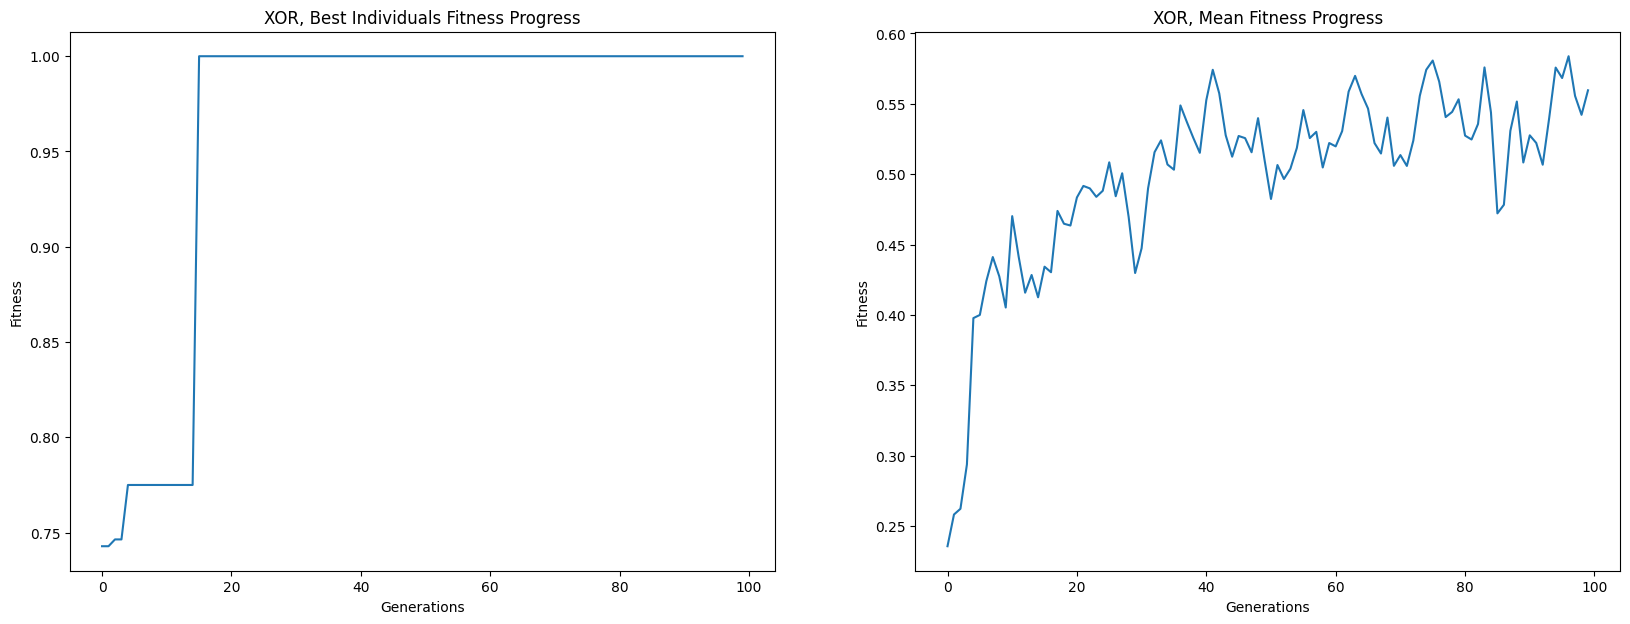

In [ ]:
# matplolib graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))

# XOR, fitness progress fitness mean
plt.subplot(1, 2, 1)
plt.plot(ag_xor.best_individuals)
plt.ylabel('Fitness')
plt.xlabel('Generations')
plt.title('XOR, Best Individuals Fitness Progress')

# XOR, fitness progress fitness mean
plt.subplot(1, 2, 2)
plt.plot(ag_xor.mean_generations)
plt.ylabel('Fitness')
plt.xlabel('Generations')
plt.title('XOR, Mean Fitness Progress')
plt.show()


En la primera gráfica, podemos observar que el fitness del mejor individuo de la población va aumentando en cada generación hasta llegar a una generación entre 15 y 20 que es donde el algoritmo converge y se obtiene el máximo valor de fitness. Sabemos que esto ocurre gracias a la técnica del elitismo, que hace que los mejores individuos de la población pasen directamente a la siguiente generación sin sufrir ningún cambio. De esta manera, se asegura que los mejores porcentajes de acierto estarán presentes en la próxima iteración y se buscan cambios que puedan mejorarlos en nuevas generaciones. Con esta técnica, el algoritmo converge más rápido y se obtienen mejores resultados. Otra razón de la rápida convergencia, puede ser el tamaño del dataset, que es muy pequeño y por tanto, el algoritmo converge más rápido.

Por otro lado, la gráfica de la derecha muestra la evolución del fitness medio de la población en cada generación. Este valor va aumentando cada vez ya que cada individuo de la población va mejorando su fitness en cada generación. En este caso, el algoritmo converge más lentamente que en el caso anterior y se puede deber a que siempre se modifica el 95% de la población mediante el cruce y la mutación, por lo que se pierde información de las generaciones anteriores y se tarda más en llegar a un valor de fitness alto. Además, con esto se asegura una mayor dispersión de los individuos de la población y se trata de evitar que el algoritmo converja demasiado rápido aunque en este caso lo haga.

## Evolución del fitness con Titanic Dataset

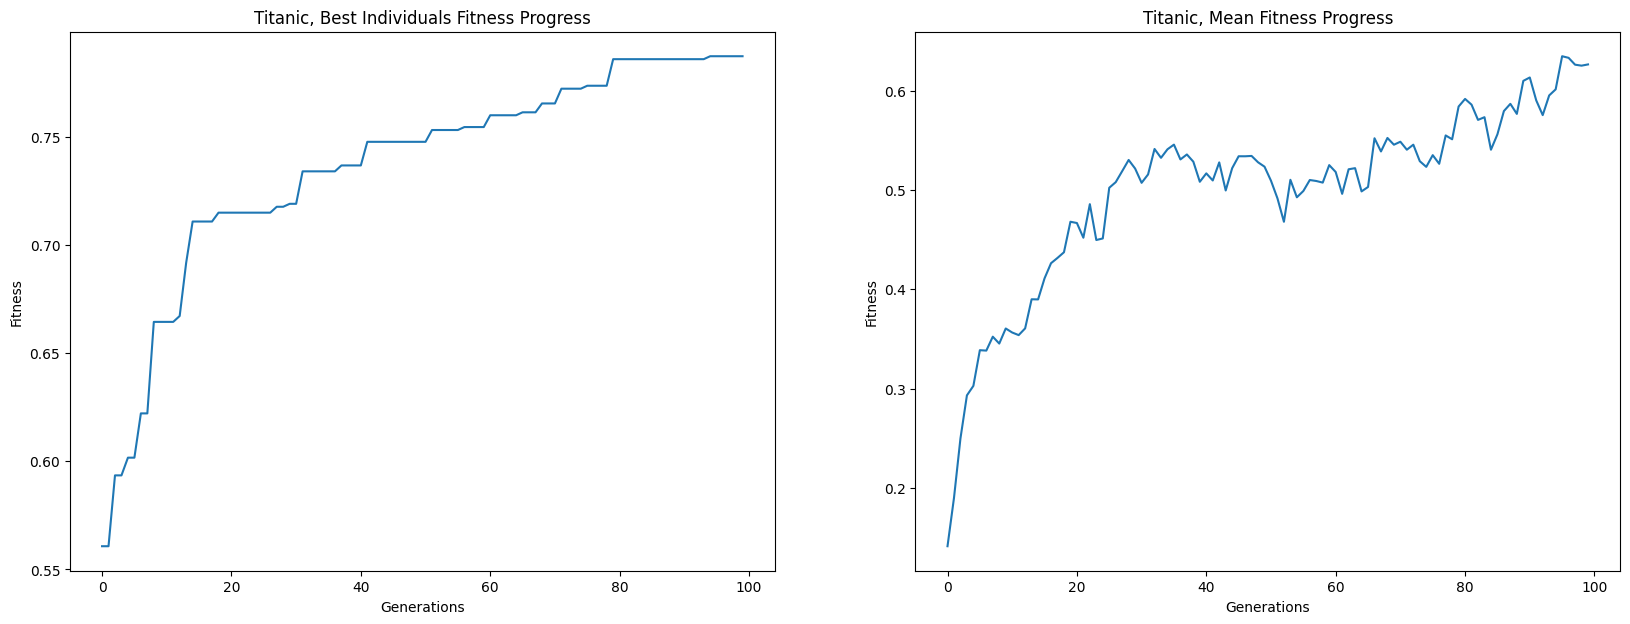

In [ ]:
plt.figure(figsize=(20, 7))

# Titanic, fitness progress fitness mean
plt.subplot(1, 2, 1)
plt.plot(ag_titanic.best_individuals)
plt.ylabel('Fitness')
plt.xlabel('Generations')
plt.title('Titanic, Best Individuals Fitness Progress')

# Titanic, fitness progress fitness mean
plt.subplot(1, 2, 2)
plt.plot(ag_titanic.mean_generations)
plt.ylabel('Fitness')
plt.xlabel('Generations')
plt.title('Titanic, Mean Fitness Progress')
plt.show()

Para el dataset de Titanic, obtenemos unas representaciones muy diferentes a las del dataset XOR. En este caso, el fitness del mejor individuo no llega a converger tan rápido como en el caso anterior, debido principalmente a que este dataset es mucho más grande. Aun así, el fitness va mejorando en cada generación y se establece ligeramente alrededor del 80%. Se pueden observar los saltos que se producen en el fitness del mejor individuo entre las generaciones 16 y 17, así como entre las generaciones 80 y 81. Esto ocurre porque de una generación a otra, se ha encontrado un individuo con una mejora de fitness muy grande que aparece en la gráfica como un salto.

Por otro lado, la gráfica de la derecha muestra la evolución del fitness medio de la población en cada generación y se puede observar que tarda mucho más en aumentar y converger comparado con el XOR. Incluso hay un momento en el que el fitness medio para estabilizarse alrededor de las generaciones 30 y 70. Esto se debe a que el dataset es mucho más grande y por tanto, el algoritmo tarda más en converger. Cabe destacar que en esta gráfica no se aprecian tanto la dispersión de los datos. Se nota que la media del fitness aumenta poco a poco y los datos están muy juntos. Esto indica que la velocidad a la que mejoran es muy similar y no hay un individuo que destaque por encima de los demás como en el dataset XOR.